weekly expenses (7 days)
just type numbers like 5 or 5.5 etc


--- Food ---
day 1 expense: 4
day 2 expense: 7
day 3 expense: 8
day 4 expense: 5
day 5 expense: 2
day 6 expense: 9
day 7 expense: 3.33

--- Transport ---
day 1 expense: 2.4
day 2 expense: 1.3
day 3 expense: 11.35
day 4 expense: 0
day 5 expense: 13
day 6 expense: 3.5
day 7 expense: 0

--- Clothes ---
day 1 expense: 17.50
day 2 expense: 0
day 3 expense: 0
day 4 expense: 14.95
day 5 expense: 34.90
day 6 expense: 79.80
day 7 expense: 6.5

--- Entertainment ---
day 1 expense: 0
day 2 expense: 11.5
day 3 expense: 2
day 4 expense: 0
day 5 expense: 0
day 6 expense: 13
day 7 expense: 20.90

--- totals ---
Food total: 38.33 | avg per day: 5.475714285714285
Transport total: 31.55 | avg per day: 4.507142857142857
Clothes total: 153.65 | avg per day: 21.95
Entertainment total: 47.4 | avg per day: 6.771428571428571

highest category is: Clothes with 153.65

week total (all): 270.93
daily average (all categories): 38.70428571428572

set y

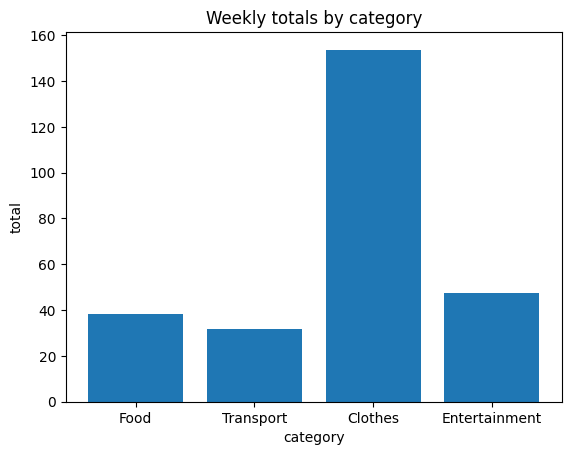

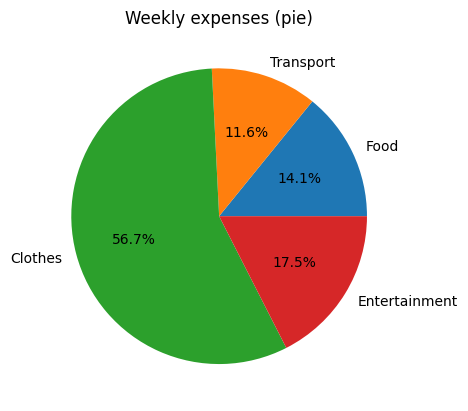

In [1]:
# ~~~~~~~~A C T I V I T Y 8 PYTHON - Weekly Expenses~~~~~~~~
# By Julia Rosa Martinez Redondo jm25057
# download in form of ipynb because of the saw of results to be possible :D
import csv
import matplotlib.pyplot as plt   # for charts  (using google colab because I dont have it imported in visual)


# ~~~~~~~~SETUP~~~~~~~~
days = 7
cats = ["Food", "Transport", "Clothes", "Entertainment"]

# dictionary: category -> list of 7 numbers
expenses = {
    "Food": [],
    "Transport": [],
    "Clothes": [],
    "Entertainment": []
}

print("weekly expenses (7 days)")
print("just type numbers like 5 or 5.5 etc\n")


# ~~~~~~~~USER INPUT~~~~~~~~
# i ask 7 days for each category (simple way)
for c in cats:
    print("\n---", c, "---")
    d = 1
    while d <= days:
        val = float(input("day " + str(d) + " expense: "))
        expenses[c].append(val)
        d += 1


# ~~~~~~~~TOTALS PER CATEGORY~~~~~~~~
totals = {}   # category -> total (sum)
avgs = {}     # category -> avg per day

for c in cats:
    total_c = sum(expenses[c])
    totals[c] = total_c
    avgs[c] = total_c / days

print("\n--- totals ---")
for c in cats:
    print(c, "total:", totals[c], "| avg per day:", avgs[c])


# ~~~~~~~~HIGHEST CATEGORY~~~~~~~~
# find which category has biggest total
highest_cat = cats[0]
for c in cats:
    if totals[c] > totals[highest_cat]:
        highest_cat = c

print("\nhighest category is:", highest_cat, "with", totals[highest_cat])


# ~~~~~~~~DAILY AVERAGES (ALL CATEGORIES)~~~~~~~~
# average spend per day (sum of all categories that day)
daily_totals = []
i = 0
while i < days:
    day_sum = 0
    for c in cats:
        day_sum += expenses[c][i]
    daily_totals.append(day_sum)
    i += 1

overall_week_total = sum(daily_totals)
daily_avg = overall_week_total / days

print("\nweek total (all):", overall_week_total)
print("daily average (all categories):", daily_avg)


# ~~~~~~~~BUDGET LIMIT~~~~~~~~
budget_limit = float(input("\nset your weekly budget limit: "))

if overall_week_total > budget_limit:
    print("WARNING!!! you exceeded the budget :(")
    print("over by:", overall_week_total - budget_limit)
else:
    print("ok you are inside the budget :)")
    print("remaining:", budget_limit - overall_week_total)


# ~~~~~~~~SAVE CSV~~~~~~~~
# save summary only (category, total, avg)
file = open("weekly_expenses_summary.csv", "w", newline="")
writer = csv.writer(file)

writer.writerow(["category", "total", "avg_per_day"])

for c in cats:
    writer.writerow([c, totals[c], avgs[c]])

file.close()

print("\nCSV saved as weekly_expenses_summary.csv")


# ~~~~~~~~BAR CHART~~~~~~~~
# bar chart for totals
x_labels = cats
y_values = [totals["Food"], totals["Transport"],
            totals["Clothes"], totals["Entertainment"]]

plt.figure()
plt.bar(x_labels, y_values)
plt.title("Weekly totals by category")
plt.xlabel("category")
plt.ylabel("total")
plt.show()


# ~~~~~~~~PIE CHART~~~~~~~~
plt.figure()
plt.pie(y_values, labels=x_labels, autopct="%1.1f%%")
plt.title("Weekly expenses (pie)")
plt.show()
